In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import joblib 
import os 
import pandas as pd
import numpy as np
import joblib
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

data=pd.read_csv("medical_insurance.csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229


In [2]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [3]:
data.shape

(2772, 7)

In [4]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
duplicates=data.duplicated().sum()

In [7]:
data.shape

(2772, 7)

In [8]:
print("Number of duplicate rows:", duplicates)

Number of duplicate rows: 1435


In [9]:
data=data.drop_duplicates()

In [10]:
data.duplicated().sum()

np.int64(0)

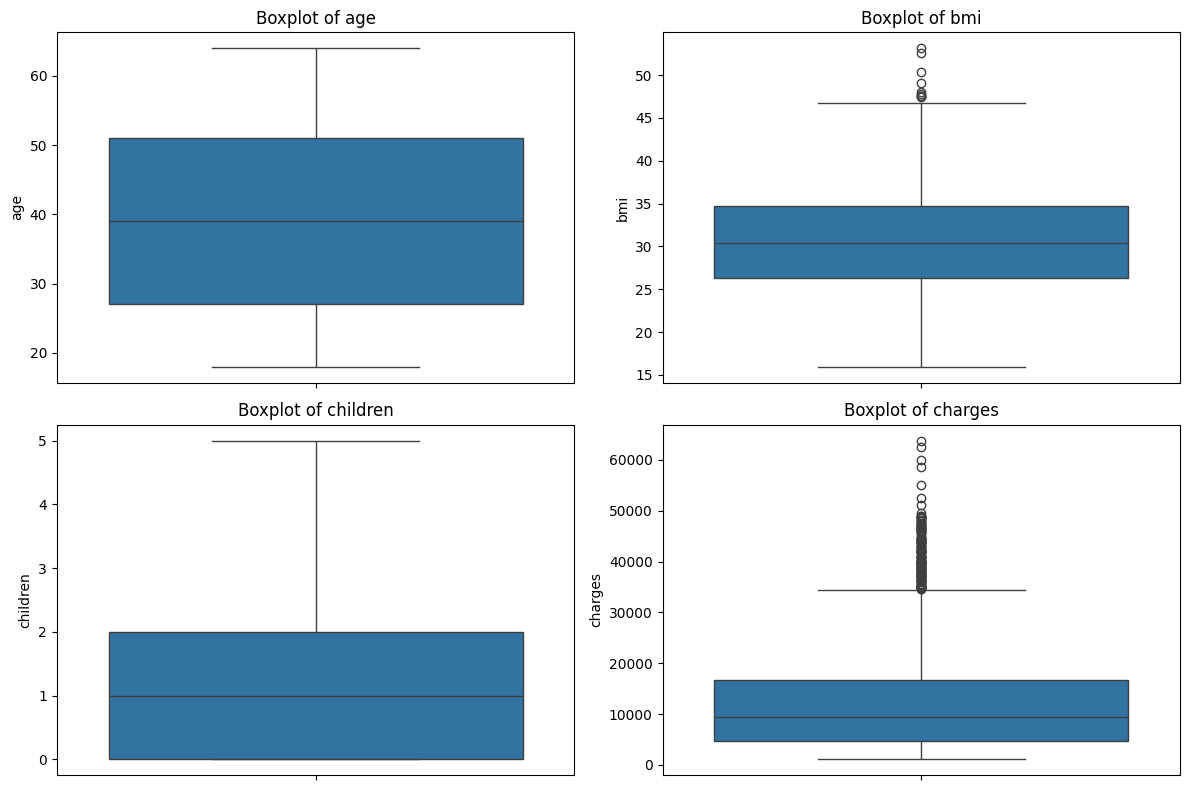

In [11]:
numerical_columns = ['age', 'bmi', 'children', 'charges']

plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

In [14]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply the function to each numerical column to remove outliers
for col in numerical_columns:
    data = remove_outliers(data, col)

In [15]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 1110 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1110 non-null   int64  
 1   sex       1110 non-null   object 
 2   bmi       1110 non-null   float64
 3   children  1110 non-null   int64  
 4   smoker    1110 non-null   object 
 5   region    1110 non-null   object 
 6   charges   1110 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 69.4+ KB
None
               age          bmi     children       charges
count  1110.000000  1110.000000  1110.000000   1110.000000
mean     38.506306    29.931248     1.079279   8716.759643
std      13.859512     5.814563     1.214959   5568.226862
min      18.000000    15.960000     0.000000   1121.873900
25%      26.000000    25.745000     0.000000   4200.566575
50%      38.000000    29.700000     1.000000   7741.223400
75%      50.000000    33.807500     2.000000  11977.032625
max     

In [16]:
data.shape

(1110, 7)

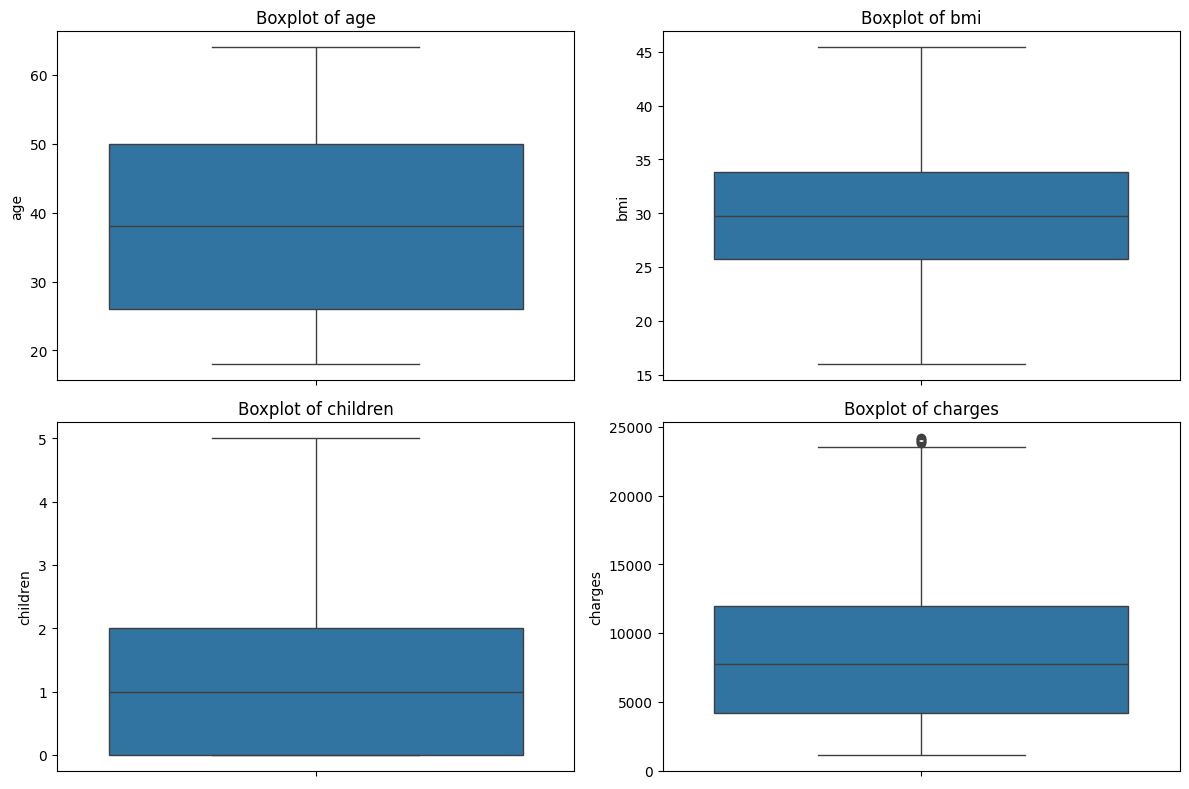

In [17]:
numerical_columns = ['age', 'bmi', 'children', 'charges']

plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

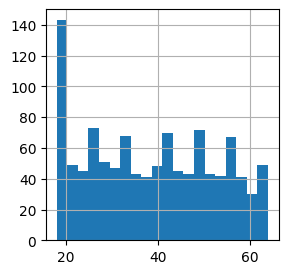

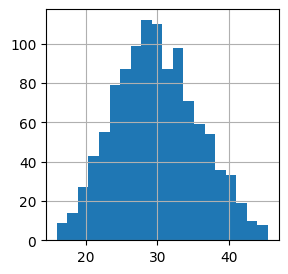

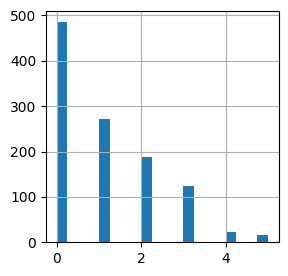

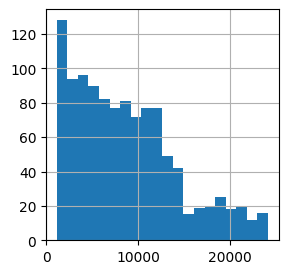

In [18]:
varquanti=['age','bmi', 'children', 'charges']
for col in varquanti:
    data[col].hist(bins=20,figsize=(3,3))
    plt.show()


In [19]:
data['charges'] = np.log(data['charges']+1)
data['age'] = np.log(data['age']+1)
data['children'] = np.log(data['children']+1)

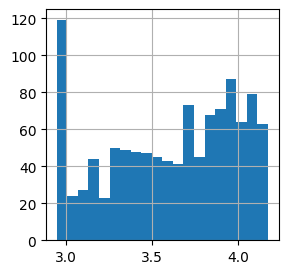

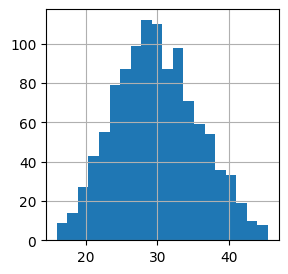

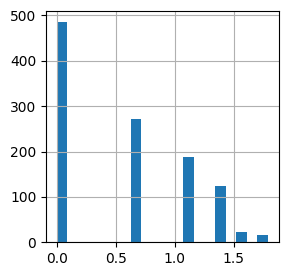

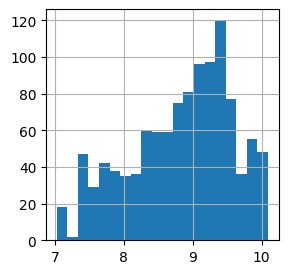

In [20]:
varquanti=['age','bmi', 'children', 'charges']
for col in varquanti:
    data[col].hist(bins=20,figsize=(3,3))
    plt.show()

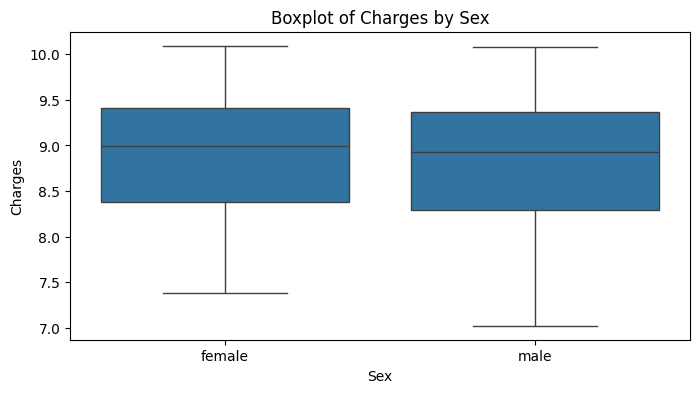

In [21]:
plt.figure(figsize=(8,4))
sns.boxplot(x='sex', y='charges', data=data)
plt.title('Boxplot of Charges by Sex')
plt.xlabel('Sex')
plt.ylabel('Charges')
plt.show()

In [22]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [23]:
y = data["charges"]
x = data.drop(["charges"], axis=1)
# Définir les colonnes catégorielles et numériques
categorical_features = ['sex', 'smoker', 'region']
numerical_features = ['age', 'bmi', 'children']

In [24]:
x_encoded = pd.get_dummies(x, columns=['sex', 'smoker', 'region'], drop_first=True)

In [25]:
x_encoded.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,2.995732,27.900,0.000000,False,True,False,False,True
1,2.944439,33.770,0.693147,True,False,False,True,False
2,3.367296,33.000,1.386294,True,False,False,True,False
3,3.526361,22.705,0.000000,True,False,True,False,False
4,3.496508,28.880,0.000000,True,False,True,False,False


In [26]:
binary_data=x_encoded[["smoker_yes","sex_male","region_northwest","region_southeast","region_southwest"]]
non_binary_data=x_encoded.drop(columns=["smoker_yes", "sex_male", "region_northwest", "region_southeast", "region_southwest"])

In [27]:
Scaler=StandardScaler()
xs=Scaler.fit_transform(non_binary_data) 
xs_scaled=pd.DataFrame(xs,columns=non_binary_data.columns,index=non_binary_data.index)
xs_scaled.head()

,age,bmi,children
0,-1.629419,-0.349495,-1.023779
1,-1.765662,0.660494,0.216035
2,-0.642483,0.528008,1.455849
3,-0.219981,-1.243344,-1.023779
4,-0.299275,-0.180877,-1.023779


In [28]:
joblib.dump(Scaler,"scaler.pkl")

['scaler.pkl']

In [29]:
Xs_final = pd.concat([xs_scaled, binary_data], axis=1)
print(Xs_final.head())

        age       bmi  children  smoker_yes  sex_male  region_northwest  \
0 -1.629419 -0.349495 -1.023779        True     False             False   
1 -1.765662  0.660494  0.216035       False      True             False   
2 -0.642483  0.528008  1.455849       False      True             False   
3 -0.219981 -1.243344 -1.023779       False      True              True   
4 -0.299275 -0.180877 -1.023779       False      True              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False  


In [30]:
x_train, x_test,y_train,y_test=train_test_split(Xs_final,y,test_size=0.2,random_state=123)

In [31]:
print(x_train.shape)
print(x_test.shape)

(888, 8)
(222, 8)


In [32]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [33]:
Xs_final.columns

Index(['age', 'bmi', 'children', 'smoker_yes', 'sex_male', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [34]:
model.coef_

array([ 0.5285559 ,  0.03371535,  0.11416686,  1.3023174 , -0.08281388,
       -0.10197298, -0.17023559, -0.17782666])

In [35]:
model.intercept_

np.float64(8.867837599593237)

In [36]:
pred=model.predict(x_test)
MSE=mean_squared_error(pred,y_test)
R2_score=r2_score(pred,y_test)
print(MSE)
R2_score

0.16313557072436705


0.5981827488864307

Text(0, 0.5, 'predicted values')

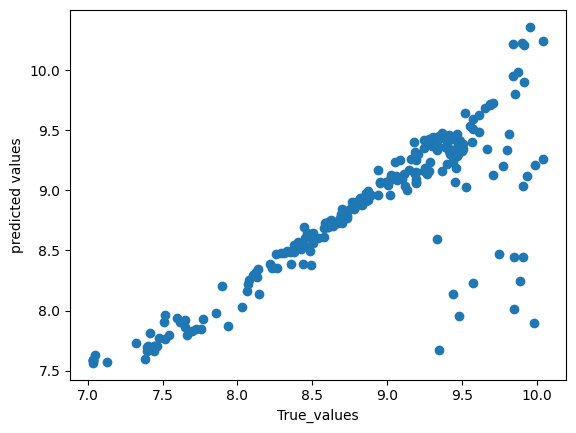

In [37]:
plt.scatter(y_test,pred)
plt.xlabel("True_values")
plt.ylabel("predicted values")

In [38]:
model1=Ridge()

In [39]:
# Préciser les valeurs de lambda à tester 
nb_va=300
# donne des valeurs entre 10^(-3) et 10^(2)
lambda_values=np.logspace(-3,2,nb_va)
lambda_range={"alpha":lambda_values}

In [40]:
model1=Ridge()

In [41]:
grid=GridSearchCV(model1,lambda_range,scoring="neg_mean_squared_error",
                  cv=5)

In [42]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-03, 1.03925568e-03, 1.08005237e-03, 1.12245057e-03,
       1.16651313e-03, 1.21230540e-03, 1.25989528e-03, 1.30935333e-03,
       1.36075289e-03, 1.41417017e-03, 1.46968439e-03, 1.52737785e-03,
       1.58733611e-03, 1.64964807e-03, 1.71440614e-03, 1.78170632e-03,
       1.85164842e-03, 1.92433614e-03, 1.99987727e-03, 2....
       4.12462638e+01, 4.28654141e+01, 4.45481252e+01, 4.62968923e+01,
       4.81143084e+01, 5.00030684e+01, 5.19659730e+01, 5.40059328e+01,
       5.61259726e+01, 5.83292359e+01, 6.06189899e+01, 6.29986298e+01,
       6.54716840e+01, 6.80418197e+01, 7.07128478e+01, 7.34887289e+01,
       7.63735792e+01, 7.93716762e+01, 8.24874655e+01, 8.57255673e+01,
       8.90907830e+01, 9.25881025e+01, 9.62227117e+01, 1.00000000e+02])},
             scoring='neg_mean_squared_error')

In [43]:
grid.best_params_

{'alpha': np.float64(0.2193497398905058)}

In [44]:
model1=Ridge(alpha=0.2193497398905058)
model1.fit(x_train,y_train)

Ridge(alpha=0.2193497398905058)

In [45]:
print(x_train.columns)
print(model1.coef_)

Index(['age', 'bmi', 'children', 'smoker_yes', 'sex_male', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')
[ 0.52834617  0.0333408   0.11418804  1.29810029 -0.0826805  -0.10160106
 -0.1694536  -0.17728438]


In [46]:
print(model1.intercept_)

8.867734565310766


In [47]:
pred2=model1.predict(x_test)
MSE=mean_squared_error(pred2,y_test)
R2_score=r2_score(pred2,y_test)
print(MSE.round(2))
print(R2_score)

0.16
0.5971849925931896


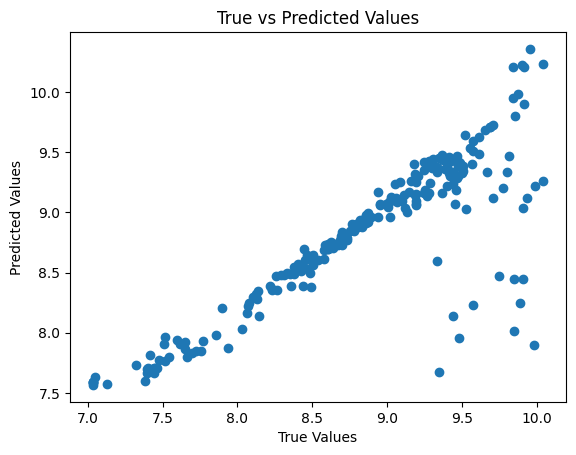

In [48]:
plt.scatter(y_test, pred2)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values")
plt.show()

In [49]:
nb_va=300
lambda_values=np.logspace(-3,2,nb_va)
lambda_range={"alpha":lambda_values}

In [50]:
model2=Lasso()
grid=GridSearchCV(model2,lambda_range,scoring='neg_mean_squared_error',cv=5)
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([1.00000000e-03, 1.03925568e-03, 1.08005237e-03, 1.12245057e-03,
       1.16651313e-03, 1.21230540e-03, 1.25989528e-03, 1.30935333e-03,
       1.36075289e-03, 1.41417017e-03, 1.46968439e-03, 1.52737785e-03,
       1.58733611e-03, 1.64964807e-03, 1.71440614e-03, 1.78170632e-03,
       1.85164842e-03, 1.92433614e-03, 1.99987727e-03, 2....
       4.12462638e+01, 4.28654141e+01, 4.45481252e+01, 4.62968923e+01,
       4.81143084e+01, 5.00030684e+01, 5.19659730e+01, 5.40059328e+01,
       5.61259726e+01, 5.83292359e+01, 6.06189899e+01, 6.29986298e+01,
       6.54716840e+01, 6.80418197e+01, 7.07128478e+01, 7.34887289e+01,
       7.63735792e+01, 7.93716762e+01, 8.24874655e+01, 8.57255673e+01,
       8.90907830e+01, 9.25881025e+01, 9.62227117e+01, 1.00000000e+02])},
             scoring='neg_mean_squared_error')

In [51]:
grid.best_params_

{'alpha': np.float64(0.001)}

In [52]:
model2=Lasso(alpha=0.001)
model2.fit(x_train,y_train)

Lasso(alpha=0.001)

In [53]:
print(x_train.columns)
print(model2.coef_)

Index(['age', 'bmi', 'children', 'smoker_yes', 'sex_male', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')
[ 0.52749798  0.03059288  0.1130544   1.28835601 -0.07853416 -0.08632895
 -0.15228343 -0.16161166]


In [54]:
print(model2.intercept_)

8.8545667801235


In [55]:
pred3=model2.predict(x_test)
MSE=mean_squared_error(pred3,y_test)
R2_score=r2_score(pred3,y_test)
print(MSE.round(2))
print(R2_score)

0.16
0.5938836510517699


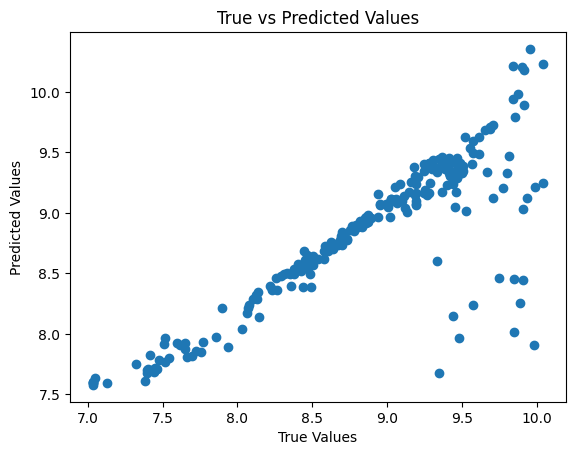

In [56]:
plt.scatter(y_test, pred3)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values")
plt.show()

In [57]:
nb_val=300 # nbr de valeurs à tester 
lambda_range=np.logspace(-3,2,nb_val) # valeurs de lambda à tester
rho_range=[0.1,0.01,0.001]    # valeurs de rho à tester  
hpers={"alpha":lambda_range,"l1_ratio":rho_range} 

In [58]:
model3=ElasticNet()
grid=GridSearchCV(model3,hpers,cv=5,scoring="neg_mean_squared_error")

In [59]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': array([1.00000000e-03, 1.03925568e-03, 1.08005237e-03, 1.12245057e-03,
       1.16651313e-03, 1.21230540e-03, 1.25989528e-03, 1.30935333e-03,
       1.36075289e-03, 1.41417017e-03, 1.46968439e-03, 1.52737785e-03,
       1.58733611e-03, 1.64964807e-03, 1.71440614e-03, 1.78170632e-03,
       1.85164842e-03, 1.92433614e-03, 1.99987727e-...
       4.81143084e+01, 5.00030684e+01, 5.19659730e+01, 5.40059328e+01,
       5.61259726e+01, 5.83292359e+01, 6.06189899e+01, 6.29986298e+01,
       6.54716840e+01, 6.80418197e+01, 7.07128478e+01, 7.34887289e+01,
       7.63735792e+01, 7.93716762e+01, 8.24874655e+01, 8.57255673e+01,
       8.90907830e+01, 9.25881025e+01, 9.62227117e+01, 1.00000000e+02]),
                         'l1_ratio': [0.1, 0.01, 0.001]},
             scoring='neg_mean_squared_error')

In [60]:
grid.best_params_

{'alpha': np.float64(0.001), 'l1_ratio': 0.001}

In [61]:
model3=ElasticNet(alpha=0.001,l1_ratio=0.001)

In [62]:
model3.fit(x_train,y_train)

ElasticNet(alpha=0.001, l1_ratio=0.001)

In [63]:
print(model3.coef_)
print(model3.intercept_)

[ 0.52771021  0.03221413  0.11424982  1.28541507 -0.08227384 -0.10047129
 -0.16709249 -0.17564131]
8.867414040338437


In [64]:
pred4=model3.predict(x_test)
MSE=mean_squared_error(pred4,y_test)
R2_score=r2_score(pred4,y_test)
MSE.round(2)
print(MSE)
R2_score

0.1633102145628556


0.5941279917329617

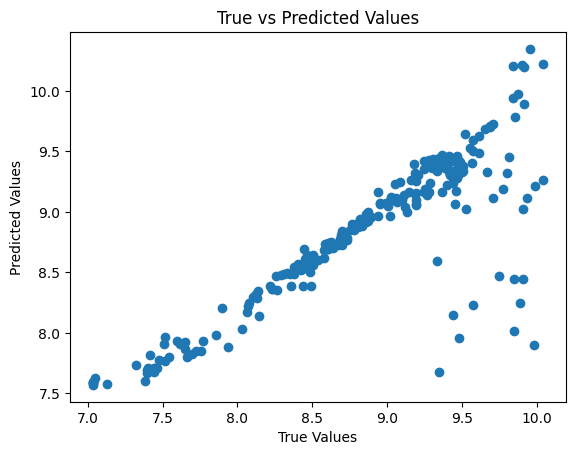

In [65]:
plt.scatter(y_test, pred4)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values")
plt.show()

In [66]:
joblib.dump(model, 'model.pkl')

['model.pkl']

In [67]:
scaler = joblib.load('scaler.pkl')
scaler.feature_names_in_

array(['age', 'bmi', 'children'], dtype=object)